In [4]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding

In [5]:
df = pd.read_csv("EPiC_Database_2019.csv", names = ['Category', 'Material', 'Functional unit', 'Embodied Energy (MJ)', 'Embodied Water (L)', 'Embodied Greenhouse Gas Emissions (kgCO₂e)', 'More information'], skiprows= 1)
df.head(10) 


,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432
5,Concrete and plaster products,Portland cement,kg,11.8,7.8,1.3,http://doi.org/10.26188/5da55701cee5d
6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7
7,Concrete and plaster products,AAC block - 600 × 200 × 100 mm,no.,56.4,55.4,4.7,http://doi.org/10.26188/5da551fc254d7
8,Concrete and plaster products,AAC block - 600 × 200 × 150 mm,no.,84.5,83,7,http://doi.org/10.26188/5da551fc254d7
9,Concrete and plaster products,AAC block - 600 × 200 × 200 mm,no.,113,111,9.4,http://doi.org/10.26188/5da551fc254d7


In [6]:
# from openai.embeddings_utils import get_embedding

# test_df['embeddings'] = test_df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# test_df.to_csv('word_embeddings.csv')

In [7]:
df_em = pd.read_csv('word_embeddings.csv')
df_em['embeddings'] = df_em['embeddings'].apply(eval).apply(np.array)
df_em

,Unnamed: 0,Material,embeddings
0,0,0. Plasterboard-Standard-Paint-White-Matte,"[0.003881110344082117, 0.0034373656380921602, ..."
1,1,1. Masonry-Block-190x390-Running-Natural,"[-0.0011347883846610785, 0.0077765635214746, -..."
2,2,2. EDEN_Wet-Areas-Wall-Tile-600-x-600,"[0.009853625670075417, 0.010180942714214325, -..."
3,3,3. ---Plasterboard---Plasterboard,"[-0.004548346158117056, 0.004125015344470739, ..."
4,4,4. Wood-Pine-Stud,"[-0.0007378872251138091, 0.008706395514309406,..."
5,5,5. ATO_Timber-Shiplap_45UP,"[-0.028975583612918854, 0.015434159897267818, ..."
6,6,6. Metal-Steel-Furring-Zincalume,"[-0.003701475216075778, 0.012387648224830627, ..."
7,7,7. ACU_PLY01_PLYWOOD,"[-0.002357288496568799, 0.0019214723724871874,..."
8,8,8. ATO_Timber-Shiplap_45DOWN,"[-0.03163563087582588, 0.010707972571253777, -..."
9,9,9. ---PLYWOOD,"[0.004955127369612455, -0.009813971817493439, ..."


In [8]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
pddf = pd.read_csv('word_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(pddf.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape

(53, 2)

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib
# import numpy as np

# colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
# x = [x for x,y in vis_dims]
# y = [y for x,y in vis_dims]
# color_indices = pddf.Material.values - 1

# colormap = matplotlib.colors.ListedColormap(colors)
# plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
# for score in [0,1,2,3,4]:
#     avg_x = np.array(x)[pddf.Material-1==score].mean()
#     avg_y = np.array(y)[pddf.Material-1==score].mean()
#     color = colors[score]
#     plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

# plt.title("Amazon ratings visualized in language using t-SNE")

In [10]:
search_term = input('Enter a search term: ')

In [11]:
search_term_vector = get_embedding(search_term, engine='text-embedding-ada-002')
search_term_vector

[-0.013304656371474266,
 0.016997378319501877,
 0.008946702815592289,
 -0.015952011570334435,
 -0.0008557236287742853,
 0.007344713434576988,
 -0.02850997820496559,
 -0.02037784643471241,
 0.022006988525390625,
 -0.005359197035431862,
 0.017961286008358,
 0.01965830847620964,
 -0.007724846247583628,
 0.0012473115930333734,
 -0.004452987108379602,
 -0.008220377378165722,
 0.019332479685544968,
 0.028890110552310944,
 0.007229316048324108,
 -0.012727668508887291,
 -0.03263713791966438,
 0.03377753496170044,
 -0.033913299441337585,
 0.0015027134213596582,
 -0.007894548587501049,
 -0.0064215329475700855,
 0.0013117983471602201,
 -0.025794742628932,
 -0.0008226316422224045,
 -0.00596673134714365,
 0.03744310513138771,
 -0.01749969646334648,
 -0.023310301825404167,
 -0.009299683384597301,
 -0.01172981970012188,
 -0.006693056784570217,
 -0.0019549699500203133,
 -0.0022281906567513943,
 0.02265864424407482,
 -0.025903351604938507,
 0.006791484076529741,
 -0.015897706151008606,
 -0.007616236805

In [12]:
from openai.embeddings_utils import cosine_similarity
df_em['similarities'] = df_em['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector))
df_em.sort_values("similarities", ascending=False).head(20)

,Unnamed: 0,Material,embeddings,similarities
16,16,16. ACU_ACP01_ACOUSTIC-PANEL,"[-0.0024096742272377014, 0.016715385019779205,...",0.833300
20,20,20. ACOUSTIC-PANEL(1),"[0.0077290828339755535, -0.0038749391678720713...",0.827156
19,19,19. ACU_ACP01_ACOUSTIC-PANEL-BLUE,"[-0.005209614057093859, 0.007124258205294609, ...",0.824288
39,39,39. Roofing---Lysaght-Custom-Orb,"[0.009283977560698986, -0.004541452974081039, ...",0.786679
30,30,30. ---VINYL SHEETING---Vinyl-Sheeting,"[-0.0032605575397610664, 0.0019172013271600008...",0.786351
6,6,6. Metal-Steel-Furring-Zincalume,"[-0.003701475216075778, 0.012387648224830627, ...",0.784822
13,13,13. TUBE-FELT,"[-0.01758037880063057, -0.009097300469875336, ...",0.783796
7,7,7. ACU_PLY01_PLYWOOD,"[-0.002357288496568799, 0.0019214723724871874,...",0.783054
8,8,8. ATO_Timber-Shiplap_45DOWN,"[-0.03163563087582588, 0.010707972571253777, -...",0.782365
31,31,31. ---VINYL SHEETING---WOVEN-Vinyl-Sheeting,"[-0.005005117505788803, 0.0029473493341356516,...",0.778459


In [13]:
# from openai.embeddings_utils import get_embedding

# df['embeddings'] = df['Material'].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# df.to_csv('word_embeddings_EPiC.csv')

In [14]:
df_epic = pd.read_csv('word_embeddings_EPiC.csv')
df_epic['embeddings'] = df_epic['embeddings'].apply(eval).apply(np.array)
df_epic

,Unnamed: 0,Category,Material,Functional unit,Embodied Energy (MJ),Embodied Water (L),Embodied Greenhouse Gas Emissions (kgCO₂e),More information,embeddings
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,"[-0.02005346491932869, -0.0024382583796977997,..."
1,1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.005028039216995239, 0.006394283380359411, ..."
2,2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,"[-0.00465925969183445, 0.008461344987154007, -..."
3,3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,"[-0.0043403590098023415, 0.008137354627251625,..."
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,"[-0.012803852558135986, 0.014618215151131153, ..."
...,...,...,...,...,...,...,...,...,...
279,279,Timber products,Structural insulated panel (SIP),m²,2 624,4 219,135,http://doi.org/10.26188/5da5586fec593,"[-0.009794671088457108, 0.009694453328847885, ..."
280,280,Timber products,SIP - 142 mm,m²,3 327,5 349,171,http://doi.org/10.26188/5da5586fec593,"[0.00539021659642458, 0.01879829913377762, -0...."
281,281,Timber products,SIP - 162 mm,m²,3 795,6 103,195,http://doi.org/10.26188/5da5586fec593,"[0.0035224827006459236, 0.023833518847823143, ..."
282,282,Timber products,Softwood,m³,9 392,13 091,549,http://doi.org/10.26188/5da5578416cc9,"[0.003608147846534848, -0.011392055079340935, ..."


In [25]:
search_term_epic = input('Enter a search term: ')

In [27]:
search_term_epic = input('Enter a search term: ')
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_epic['similarities'] = df_epic['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
sort_df = df_epic.sort_values("similarities", ascending=False)
sort_df[['Material','Category','similarities']].head(10)

,Material,Category,similarities
16,Concrete 32 MPa,Concrete and plaster products,0.872931
0,Concrete block,Concrete and plaster products,0.868728
10,Concrete 20 MPa,Concrete and plaster products,0.868703
19,Concrete 40 MPa,Concrete and plaster products,0.868093
22,Concrete 50 MPa,Concrete and plaster products,0.867279
13,Concrete 25 MPa,Concrete and plaster products,0.864124
4,Cement mortar,Concrete and plaster products,0.855560
15,Concrete 25 MPa - 30% GGBFS,Concrete and plaster products,0.843054
12,Concrete 20 MPa - 30% GGBFS,Concrete and plaster products,0.842433
24,Concrete 50 MPa - 30% GGBFS,Concrete and plaster products,0.841763


In [17]:
highest_similarity = df_epic['similarities'].max()

In [18]:
if highest_similarity >= 0.9:
    fact_with_highest_similarity = df_epic.loc[df_epic['similarities'] == highest_similarity, 'Material']
    print(fact_with_highest_similarity)
else:
    response = openai.Completion.create(
      model = 'text-davinci-003',
      prompt = search_term_epic,
      max_tokens = 30,
      temperature = 0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)


Insulation is a material or combination of materials used to reduce the transmission of heat, sound, or electricity. It is used in a variety


In [19]:
def search_materials(df_epic, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    df_epic["similarities"] = df_epic.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        df_epic.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "Material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [24]:
results = search_materials(df_epic, "Metal - Copper", n=3)

Copper wire

Copper sheet

Copper pipe



In [21]:
results = search_materials(df_epic, "Timber Lining (Cox)", n=5)

Cross laminated timber (CLT)

Glued laminated timber (glulam)

Fibre cement weatherboard

Softwood

Hardwood



In [22]:
results = search_materials(df_epic, "Concrete - Cast In Situ", n=5)

Concrete 32 MPa

Concrete 40 MPa

Concrete 25 MPa

Concrete block

Concrete 25 MPa - 30% fly ash



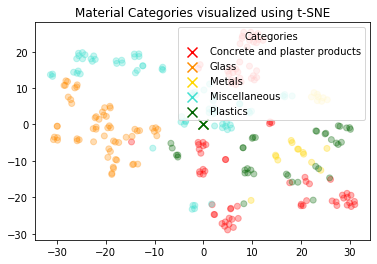

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the embeddings
df_epic_em = pd.read_csv('word_embeddings_EPiC.csv')

# Convert to a list of lists of floats
matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Define the categories and their respective colors
categories = df_epic_em['Category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

# Extract the x and y coordinates from the t-SNE result
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]

# Get the color indices for each point
color_indices = df_epic_em.Category.astype('category').cat.codes

# Create a colormap based on the categories and colors
colormap = mcolors.ListedColormap(colors)

# Scatter plot with category colors
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# Plot markers for each category
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])

# Add legend
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()